### This is an example on how to do Weibull analysis using Julia programming language.

#### The Weibull distribution is a statistical distribution (Normal distribution being the most known) that is commonly used to model life data or failure times of various types of failures.  The 2-parameter version of the Weibull distribution is the most widely-used version of the Weibull distribution.

<h3><strong>2-parameter Weibull Cumulative Distribution Function (CDF):</strong></h3><center>$\huge{F(x) = 1 - e^{(\frac{x}{\lambda})^k}}$,</center><br>
<center><p>where k is the shape parameter and $\lambda$ is the scale parameter.</p></center>

### <center>Let's say we were to model car battery failures and we found the failures follow a Weibull distribution.  &nbsp;It allows us to answer questions such as "What percent of the batteries will have failed after 200 days?"</center>

<p>We will plot data points (failure times) and try to fit them onto a straight line in order to estimate our 2 Weibull parameters (k and $\lambda$).  Since the Weibull CDF is a logarithmic function, if we attempt to plot the data ploints on 1-1 scale x and y-axis, the data will not fall onto a straight line.  To address this, we need to apply linear transformation to the Weibull CDF equation by using laws of exponents and laws of logarithms:</p>

<center>$\large{F(x) = 1 - e^{(\frac{x}{\lambda})^k}}$</center><br><br>
<center>$1-F(x)=e^{-(\frac{x}{\lambda})^k}$</center><br><br>
<center>$ln(1-F(x))=-(\frac{x}{\lambda})^k$</center><br><br>
<center>$ln\left(\frac{1}{1-F(x)}\right)=(\frac{x}{\lambda})^k$</center><br><br>
<center>$ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)=k{\space}ln(\frac{x}{\lambda})$</center><br><br>
<center>$\underbrace{ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)}=\underbrace{k{\space}lnx}-\underbrace{k{\space}ln\lambda}$</center><br>
<center>$\space\space\space y\space\space\space\space\space\space\space\space\space\space=\space mx\space+\space\space b$</center><br>
<center>("linearized" Weibull CDF)</center><br><br>
With the Weibull CDF in its linear form, <strong>y</strong> is then equal to $ln\left(ln\left(\frac{1}{1-F(x)}\right)\right){\space}$,&nbsp;the slope <strong>m</strong> equals k,&nbsp;<strong>x</strong> equals ln(x), and the y-intercept <strong>b</strong> equals $-k{\space}ln\lambda\space\space$.<br><br>
Since<br><br>$b=-k{\space}ln\lambda{\space}{\space}$&nbsp;&nbsp;, then solving for $\lambda$ :<br><br>
$\large{\lambda=e^{-(\frac{b}{k})}}$<br><br>
<p>So now that we know how to estimate the 2 Weibull parameters ($\lambda$ and k), we are almost ready to create a Weibull probability plot later on.<br><br>A Weibull probability plot is simply plotting ln(x) versus $ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)$<br><br>
But what is F(x)?  F(x) is based on calcuations for the "Median Ranks".  There are different ways to calculate median ranks.  But for Weibull distribution, it is suggested to use Bernard's formula for median ranks:</p><br>
<center>$\huge{\frac{(rank - 0.3)}{(n + 0.4)}}$</center><br>
<center>where rank is the rank of the data from smallest to largest and n equals the total number of data points</center><br><br>
Now we are ready to make a table with the necessary calcuations to plot a Weibull plot.  Let's say we have 10 failures with failure times measured in minutes:<br>
<strong>150, 85, 135, 150, 240, 190, 240, 200, 250, 200</strong><br>

#### The following is the table containing necessary calculations for our x and y cordinates of the data that we are going to use to create the Weibull 1-1 scale probability plot:

<center><table border="1">
<tr>
<th style="text-align: center;">Data<br>$x$</th>
<th style="text-align: center;">x<br>$ln(x)$</th>
<th>Rank</th>
<th style="text-align: center;">Median Rank F(x)<br>$\frac{(rank - 0.3)}{(n + 0.4)}$</th>
    <th style="text-align: center;">y<br>$ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)$</th>
</tr>
<tr>
<td>85</td>
<td>4.44265126</td>
<td style="text-align: center;">1</td>
<td>0.06730769</td>
<td>-2.66384309</td>
</tr>
<tr>
<td>135</td>
<td>4.90527478</td>
<td style="text-align: center;">2</td>
<td>0.16346154</td>
<td>-1.72326315</td>
</tr>
<tr>
<td>150</td>
<td>5.01063529</td>
<td style="text-align: center;">3</td>
<td>0.25961538</td>
<td>-1.20202312</td>
</tr>
<tr>
<td>150</td>
<td>5.01063529</td>
<td style="text-align: center;">4</td>
<td>0.35576923</td>
<td>-0.82166652</td>
</tr>
<tr>
<td>190</td>
<td>5.24702407</td>
<td style="text-align: center;">5</td>
<td>0.45192308</td>
<td>-0.50859539</td>
</tr>
<tr>
<td>200</td>
<td>5.29831737</td>
<td style="text-align: center;">6</td>
<td>0.54807692</td>
<td>-0.23036544</td>
</tr>
<tr>
<td>200</td>
<td>5.29831737</td>
<td style="text-align: center;">7</td>
<td>0.64423077</td>
<td>0.03292496</td>
</tr>
<tr>
<td>240</td>
<td>5.48063892</td>
<td style="text-align: center;">8</td>
<td>0.74038462</td>
<td>0.29903293</td>
</tr>
<tr>
<td>240</td>
<td>5.48063892</td>
<td style="text-align: center;">9</td>
<td>0.83653846</td>
<td>0.59397722</td>
</tr>
<tr>
<td>250</td>
<td>5.52146092</td>
<td style="text-align: center;">10</td>
<td>0.93269231</td>
<td>0.99268893</td>
</tr>
</table></center><br>
<strong>NOTE</strong>-We have to sort our failure times from smallest to greatest when performing the calculations.

In [1]:
data = [85,135,150,150,190,200,200,240,240,250]
sort!(data)

y = log(data)
ranks = [1:length(data)]
median_rank = (ranks - 0.3)/(length(ranks) + 0.4)
x = log(-log(1 - median_rank))

10-element Array{Float64,1}:
 -2.66384 
 -1.72326 
 -1.20202 
 -0.821667
 -0.508595
 -0.230365
  0.032925
  0.299033
  0.593977
  0.992689

In [2]:
y

10-element Array{Float64,1}:
 4.44265
 4.90527
 5.01064
 5.01064
 5.24702
 5.29832
 5.29832
 5.48064
 5.48064
 5.52146

In [3]:
x

10-element Array{Float64,1}:
 -2.66384 
 -1.72326 
 -1.20202 
 -0.821667
 -0.508595
 -0.230365
  0.032925
  0.299033
  0.593977
  0.992689

<h4>Now we're going to plot ln(x) vs $ln\left(ln\left(\frac{1}{1-median rank}\right)\right)$</h4>

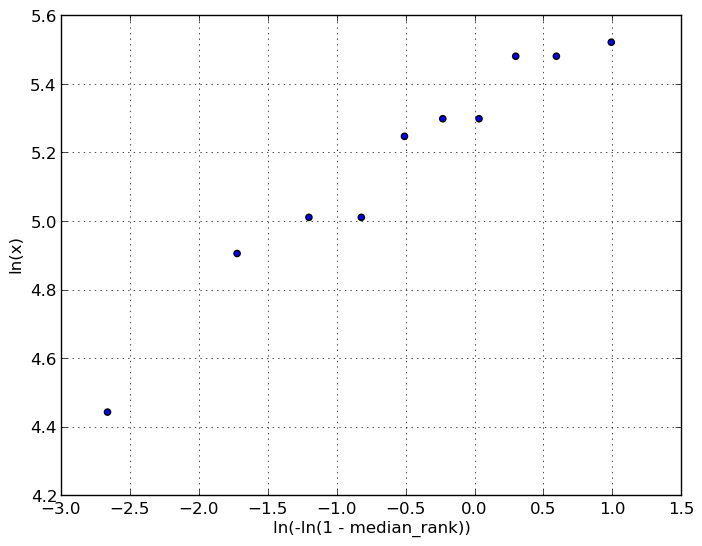

In [4]:
using PyPlot
scatter(x,y)
ylabel("ln(x)")
xlabel("ln(-ln(1 - median_rank))")
grid("on")
show()

#### Note-I plotted the failure times on the y axis, not on the x axis since best practice for small samples sizes of complete failure times are best analyzed by minimizing uncertainty in the x direction.  This is called ranked regression on X which we will be doing next.

Using the Regression package, we will utilize the linearreg_lsq() method to get the slope and y-intercept of the fit line

In [2]:
using Regression

n = 10
xmat = reshape(x, n, 1)
slope, intercept = linearreg_lsq(xmat, y, bias=true)

2-element Array{Float64,1}:
 0.292744
 5.3227  

#### Since we are regressing on the X-axis, our shape parameter is really the inverse of the slope

In [3]:
shape = 1/slope

3.4159509180911063

#### ...and instead of the y-intercept, we really need the x-intercept

In [4]:
x_intercept = - intercept / shape

-1.5581891980816043

#### Now that we have the slope and the x-intercept, the scale parameter can be calculated

In [5]:
scale = exp(-x_intercept/slope)

204.93601772144916

#### Now, let's plot the fit line and see how it fits the failure times

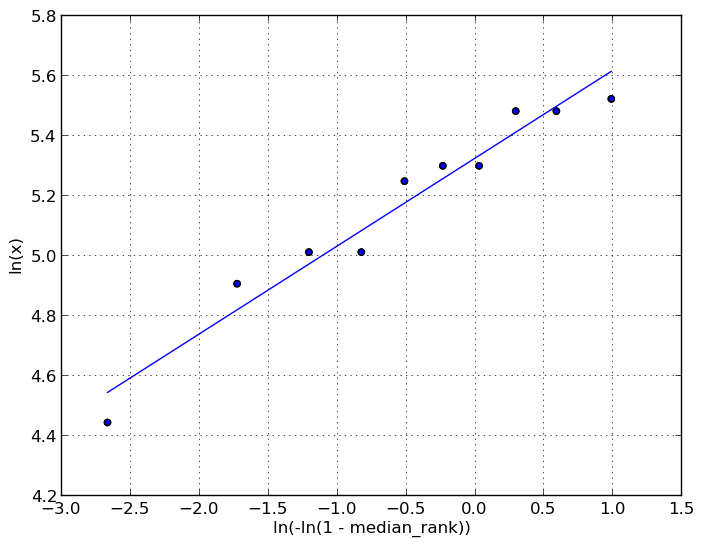

In [9]:
line = slope*x+intercept
scatter(x,y)
plot(x,line)
ylabel("ln(x)")
xlabel("ln(-ln(1 - median_rank))")
grid("on")
show()

#### Now, let's plot the Weibull fit line versus the failure times

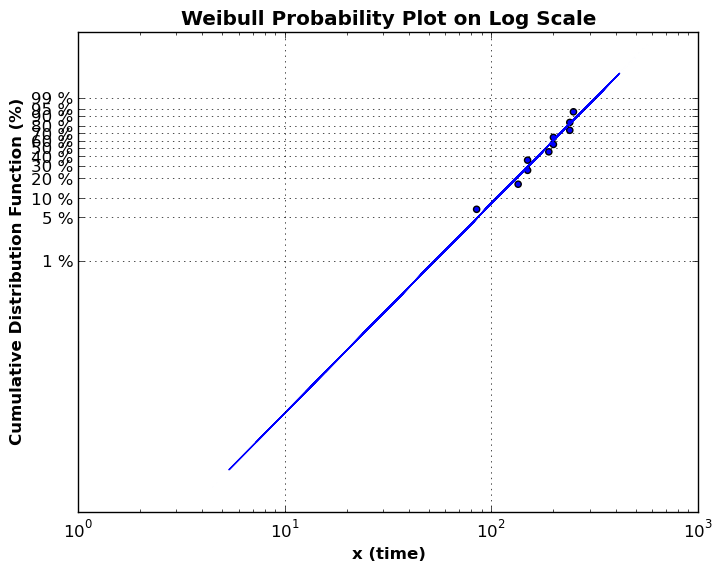

In [7]:
using Distributions  # this package is needed to use the Weibull(shape,scale) function

sort!(data)

x2 = data
ranks = [1:length(data)]
median_rank = (ranks - 0.3)/(length(ranks) + 0.4)
y2 = log(-log(1 - median_rank))

# Generate 100000 numbers following a Weibull distribution that we think ideally fits our data using the shape and scale parameter
x_ideal = rand(Weibull(shape, scale), 100000)
sort(x_ideal)

# Below is Weibull CDF
F = 1 - exp(-(x_ideal/scale).^shape)  # <--- Not sure why I needed the dot(.) for this to work

# Below is linearized Y from the equation of the line
y_ideal = log(-log(1 - F))

ax = subplot(111)
scatter(x2,y2)
semilogx(x_ideal, y_ideal)
title("Weibull Probability Plot on Log Scale", weight="bold")
xlabel("x (time)", weight="bold")
ylabel("Cumulative Distribution Function (%)", weight="bold")


function weibull_CDF(y, pos)
  @sprintf("%d %%", 100*(1-exp(-exp(y))))
end

formatter = plt.FuncFormatter(weibull_CDF)
ax["yaxis"][:set_major_formatter](formatter)

yt_F = [ 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
           0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
yt_lnF = log( -log(1-yt_F))
yticks(yt_lnF)
grid("on")
show()